### Quantum Teleportation Protocol ###

In quantum teleportation, the qubit state is transfered to another qubit by taking advantage of two classical bits and an entangled qubit pair. 

In [1]:
from qiskit import IBMQ, execute
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector
#from qiskit_textbook.tools import random_state, vector2latex
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, IBMQ

import random

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_qasm_simulator')

In [3]:
# This function creates teleportation circuit 

def teleport_circuit(qr, cr0, cr1, cr2):
    """construct a circuit"""
    
    teleport_circuit = QuantumCircuit(qr, cr0, cr1,cr2)
    
    a,b,c = 0,1,2
    """Creates a bell pair in qc using qubits a & b"""
    teleport_circuit.h(b) # Put qubit a into state |+>
    teleport_circuit.cx(b,c) # CNOT with a as control and b as target
    
    teleport_circuit.cx(a, b)
    teleport_circuit.h(a)
    
    teleport_circuit.barrier()
    
    return teleport_circuit



In [4]:
# Defining the circuit and initializing the state of the qubit to be teleported or transferred.

qr = QuantumRegister(3)   # Protocol uses 3 qubits
cr0,cr1,cr2 = ClassicalRegister(1),ClassicalRegister(1),ClassicalRegister(1)
# and 3 classical registers

QuanCir = QuantumCircuit(qr, cr0, cr1, cr2)

array([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

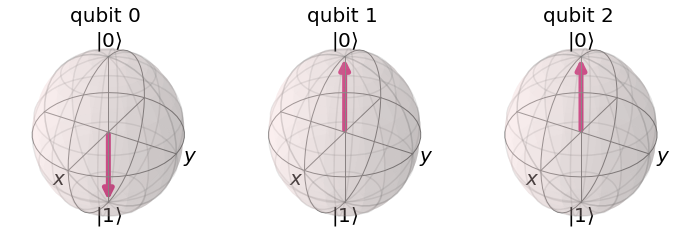

In [5]:
# initializing the qubit state to 1. 
# This state of the qubit will be trasferred or teleported. 

QuanCir.x(0)
QuanCir.barrier()


statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(QuanCir,statevector_backend).result().get_statevector()
display(final_state)
plot_bloch_multivector(final_state)

The qubit 0 is in state 1 which will be transferred to the qubit 2. The qubits qubit 1 and qubit 2 form a bell pair and the qubit 2 is teleported.

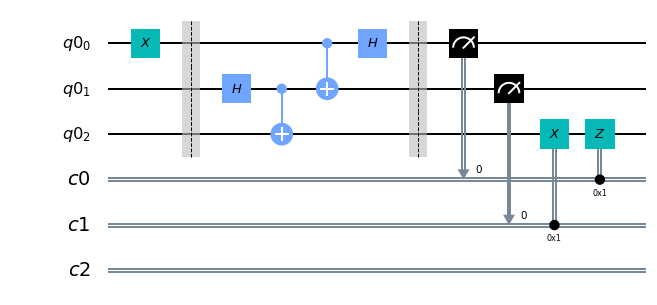

In [6]:
# Applying the teleportation circuit.

TeleCir = QuanCir + teleport_circuit(qr, cr0, cr1, cr2)

TeleCir.measure(0,0)
TeleCir.measure(1,1)
TeleCir.x(2).c_if(cr1,1)
TeleCir.z(2).c_if(cr0,1)

TeleCir.draw(output='mpl')

array([0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
       0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j,
       0.+0.0000000e+00j, 1.-1.2246468e-16j])

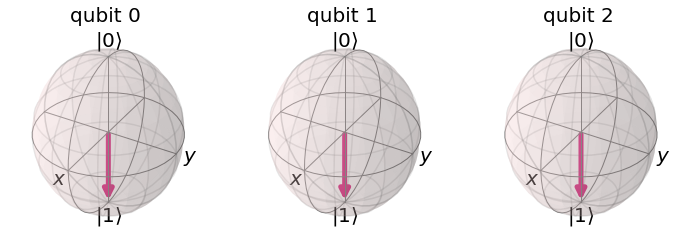

In [7]:
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(TeleCir,statevector_backend).result().get_statevector()
display(final_state)
plot_bloch_multivector(final_state)

The state of the qubit 0 is tranferred to the qubit 2. 

#### Mesurement
Measurement is applied to the 2 qubits qubit 0 and qubit 1 and the measurement is transmitted to through the classical channel. Depending on the state of the classical bits the measurement is applied to the qubit 2:

00 --> Do nothing <br><br>
01 --> Apply <b>X</b> gate <br><br>
10 --> Apply <b>Z</b> gate <br><br>
11 --> Apply <b>ZX</b> gate 

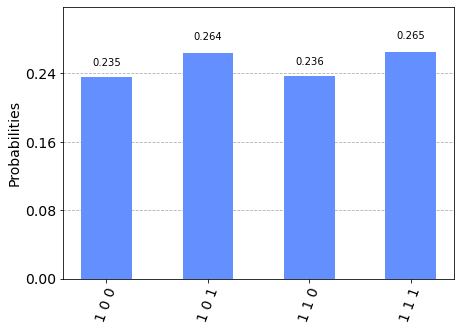

In [8]:
TeleCir.measure(2,2)
backend = Aer.get_backend('qasm_simulator')
# Since the output will be deterministic, we can use just a single shot to get it
counts = execute(TeleCir,backend,shots=1024).result().get_counts()
plot_histogram(counts)


The results show that the qubit 2 is always at state 1. In order to confirm that the teleportation actually works, lets define a superposition state on qubit 0. Define the qubit 0 at state $u_3(\theta=\pi/3, 0, 0, 0)$ which when measured state $0$ is measured with probability $75$% and state $1$ with $25$%

In [9]:
qr = QuantumRegister(3)   # Protocol uses 3 qubits
cr0,cr1,cr2 = ClassicalRegister(1),ClassicalRegister(1),ClassicalRegister(1)
# and 3 classical registers

QuanCir = QuantumCircuit(qr, cr0, cr1, cr2)

QuanCir.u3(np.pi/3,0,0,0)
QuanCir.barrier()

array([0.8660254+0.j, 0.5      +0.j, 0.       +0.j, 0.       +0.j,
       0.       +0.j, 0.       +0.j, 0.       +0.j, 0.       +0.j])

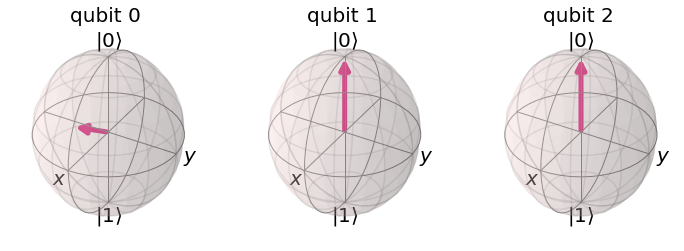

In [10]:
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(QuanCir,statevector_backend).result().get_statevector()
display(final_state)
plot_bloch_multivector(final_state)

In [11]:
# Applying measurement to the first 2 qbits and controlled x and z gates on qubit 2

Tele_circ = QuanCir + teleport_circuit(qr,cr0,cr1,cr2)
Tele_circ.measure(0,0)
Tele_circ.measure(1,1)
Tele_circ.draw(output='mpl')

Tele_circ.x(2).c_if(cr1,1)
Tele_circ.z(2).c_if(cr0,1)

print(Tele_circ)

      ┌──────────────┐ ░                ┌───┐ ░ ┌─┐                 
q1_0: ┤ U3(pi/3,0,0) ├─░─────────────■──┤ H ├─░─┤M├─────────────────
      └──────────────┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐              
q1_1: ─────────────────░─┤ H ├──■──┤ X ├──────░──╫─┤M├──────────────
                       ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ┌───┐  ┌───┐ 
q1_2: ─────────────────░──────┤ X ├───────────░──╫──╫──┤ X ├──┤ Z ├─
                       ░      └───┘           ░  ║  ║  └─┬─┘  └─┬─┘ 
                                                 ║  ║    │   ┌──┴──┐
c3_0: ═══════════════════════════════════════════╩══╬════╪═══╡ = 1 ╞
                                                    ║ ┌──┴──┐└─────┘
c4_0: ══════════════════════════════════════════════╩═╡ = 1 ╞═══════
                                                      └─────┘       
c5_0: ══════════════════════════════════════════════════════════════
                                                                    


array([0.8660254+0.000000e+00j, 0.       +0.000000e+00j,
       0.       +0.000000e+00j, 0.       +0.000000e+00j,
       0.5      -6.123234e-17j, 0.       +0.000000e+00j,
       0.       +0.000000e+00j, 0.       +0.000000e+00j])

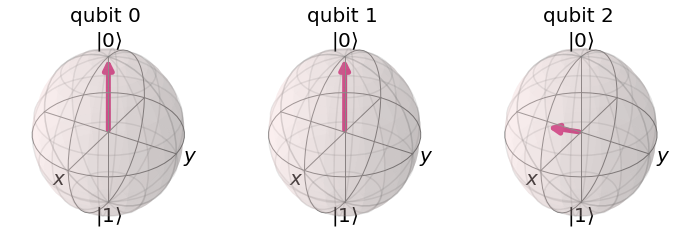

In [12]:
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(Tele_circ,statevector_backend).result().get_statevector()
display(final_state)
plot_bloch_multivector(final_state)

The state of the qubit 0 is trasferred to the qubit 2. 

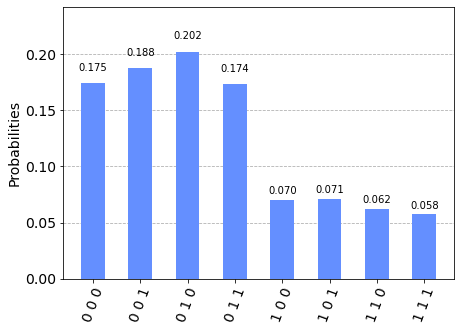

In [13]:
Tele_circ.measure(2,2)
backend = Aer.get_backend('qasm_simulator')
# Since the output will be deterministic, we can use just a single shot to get it
counts = execute(Tele_circ,backend,shots=1024).result().get_counts()
plot_histogram(counts)

The histogram shows the probability of each state when measured. Lets sum all the states where the qubit $2$ is $0$ and $1$

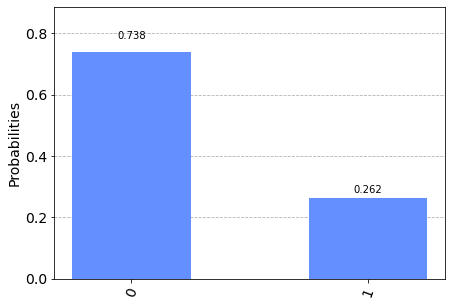

In [14]:
c0 = 0
c1 = 0
for attr in counts:
    if(attr[0] == '0'):
        c0+=counts[attr]
        
    else:
        c1+=counts[attr]
        
        
c = {'0':c0,'1':c1}
plot_histogram(c)

As expected the histogram shows the probability measurement on qubit $2$ of state $'0'$ which is $75$% and state $'1'$ which is $25$%